In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# plot()の出力をSVGにする
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# データのロード
df = pd.read_csv('./data/qerr_out.tsv', sep='\t')

# データの内容とサンプル

In [2]:
# 基準となる計測結果
df.query('d==32 & M==4 & nbits==8 & norm==False & `V-num`==20000')

,Q-type,d,M,nbits,norm,T-num,V-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
0,PQ,32,4,8,False,10000,20000,4,609,11,1,5,1,0.066315,0.058327
26,RQ,32,4,8,False,10000,20000,4,8344,139,0,75,0,0.079207,0.061852
52,LSQ,32,4,8,False,10000,20000,4,13717,1242,0,630,0,0.077733,0.061825


32次元のベクトル10,000個を各Quantizerに学習させ、後に20,000個のベクトルをエンコード&デコードし、どれだけの誤差が生じたかを計測している。
誤差は平均二乗誤差とし `sum(({decoded} - {original}) ^2) / sum(original ^2)` という計算で求める。

# 個々のパラメータと平均二乗誤差(`V-err`)との相関を見る

以下ではパラメータを1つだけいじり`V-err`に与える影響を見ていく。

Q-type  norm 
LSQ     False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
PQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
RQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
Name: V-err, dtype: object

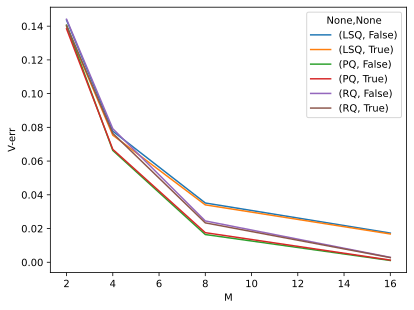

In [3]:
# M (モジュール分割数)が大きくなった際のV-err(平均二乗誤差)の推移をみる
# Mが大きくなるほどV-errは小さくなる
df_M = df.query('d==32 & nbits==8 & `V-num`==20000').sort_values(['Q-type', 'M']).set_index('M')
df_M.groupby(['Q-type', 'norm'])['V-err'].plot(ylabel='V-err', legend=True)

Q-type  norm 
LSQ     False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
PQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
RQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
Name: V-err, dtype: object

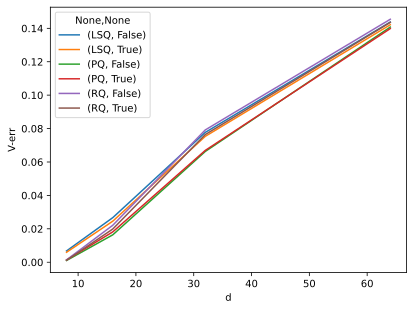

In [4]:
# d 次元が変化した際のV-err平均二乗誤差の推移をみる
# dが大きくなるほどV-errは大きくなる
df_d = df.query('M==4 & nbits==8 & `V-num`==20000').sort_values(['Q-type', 'd']).set_index('d')
df_d.groupby(['Q-type', 'norm'])['V-err'].plot(ylabel='V-err', legend=True)

Q-type  norm 
LSQ     False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
PQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
RQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
Name: V-err, dtype: object

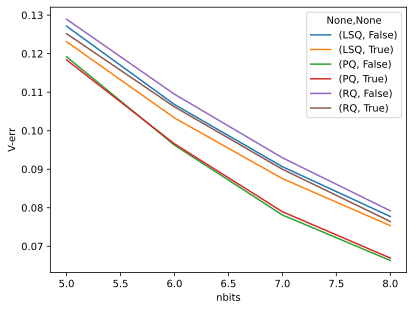

In [5]:
# nbitsが変化した際のV-err平均二乗誤差の推移をみる
# nbitsが大きくなるほどV-errは小さくなる
df_nbits = df.query('d==32 & M==4 & `V-num`==20000').sort_values(['Q-type', 'nbits']).set_index('nbits')
df_nbits.groupby(['Q-type', 'norm'])['V-err'].plot(ylabel='V-err', legend=True)

Q-type  norm 
LSQ     False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
PQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
RQ      False    Axes(0.125,0.11;0.775x0.77)
        True     Axes(0.125,0.11;0.775x0.77)
Name: V-err, dtype: object

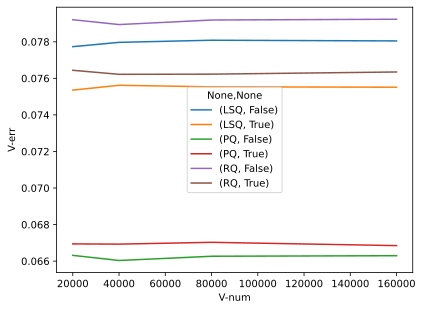

In [6]:
# V-numが変化した際のV-err平均二乗誤差の推移をみる
# V-numが大きくなってもV-errは変化しない
df_vnum = df.query('d==32 & M==4 & nbits==8').sort_values(['Q-type', 'V-num']).set_index('V-num')
df_vnum.groupby(['Q-type', 'norm'])['V-err'].plot(ylabel='V-err', legend=True)